In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms.functional as tvF
import torchvision as tv
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path


In [2]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = tvF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

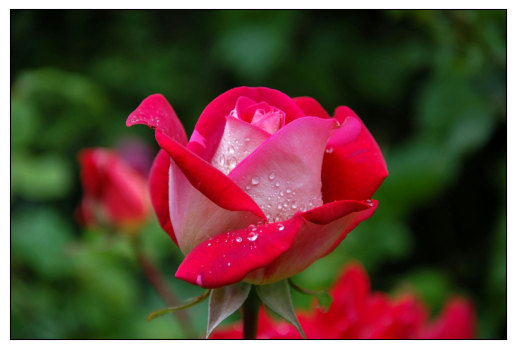

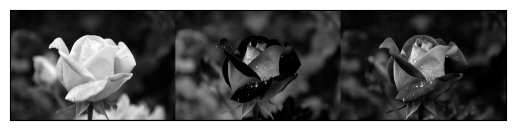

In [3]:
flower_img = read_image(str(Path('../data') / 'flower.jpg'))
show(flower_img)

show(make_grid(torch.permute(flower_img.reshape(1,*flower_img.shape),(1,0,2,3))))

/var/folders/8v/r6tfrh3s0y16r9dl8fzkgdgw0000gp/T/ipykernel_84240/3435520246.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flower_img = torch.tensor(flower_img,dtype=torch.float32)


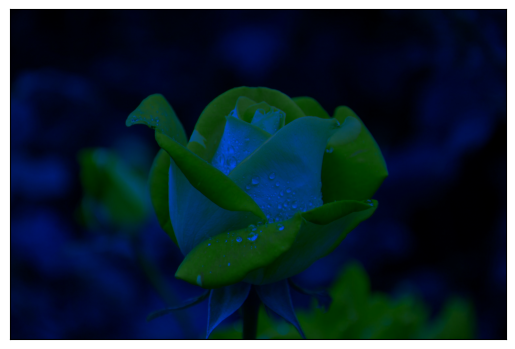

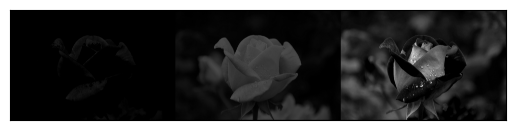

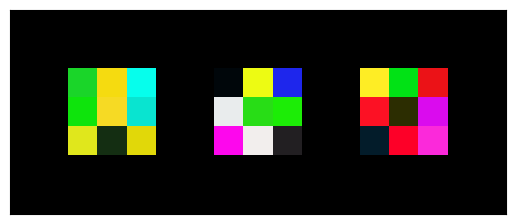

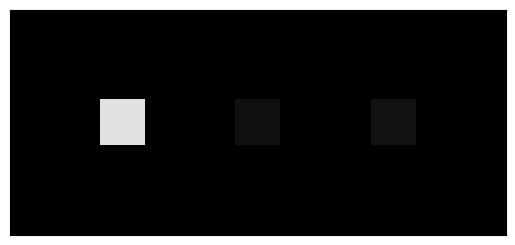

In [4]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = nn.Conv2d(3,3,3)
    def forward(self,x):
        return F.relu(self.conv1(x))


model = Model()

flower_img = torch.tensor(flower_img,dtype=torch.float32)
out = model(flower_img)
out.shape

out_flower = out.to(torch.uint8)
show(out_flower)
show(make_grid(torch.permute(out_flower.reshape(1,*out_flower.shape),(1,0,2,3))))
show(make_grid(model.conv1.weight))
show(make_grid(model.conv1.bias.reshape(3,1,1,1)))

In [5]:
for p in model.parameters():
    print(p.shape)

torch.Size([3, 3, 3, 3])
torch.Size([3])


In [6]:
pms = list(model.parameters())
# from chpl_tensor import save_tensor
import chpl_tensor
chpl_tensor.save_tensor(pms,'mini_cnn_params.chdata')

In [7]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[[[ 0.1043, -0.0437,  0.0253],
          [ 0.0550, -0.0423,  0.0361],
          [-0.1292,  0.0802, -0.1223]],

         [[-0.1721, -0.1479, -0.0107],
          [-0.1106, -0.1527, -0.1135],
          [-0.1000,  0.1821, -0.1587]],

         [[ 0.1646,  0.0660, -0.0811],
          [ 0.0477,  0.1431, -0.1888],
          [ 0.1130,  0.0742,  0.0356]]],


        [[[ 0.0015, -0.0756,  0.1190],
          [-0.0914,  0.1570,  0.1118],
          [-0.0144, -0.0566,  0.1362]],

         [[ 0.0259, -0.0214,  0.1516],
          [-0.0790, -0.1373, -0.0783],
          [ 0.0290, -0.0739,  0.1249]],

         [[ 0.0428,  0.0776, -0.0822],
          [-0.0765,  0.0877,  0.0269],
          [-0.0753, -0.0746,  0.1341]]],


        [[[-0.0081,  0.0055, -0.0837],
          [-0.0178,  0.1730, -0.1520],
          [ 0.0119, -0.0119, -0.0224]],

         [[-0.0759, -0.1188,  0.0707],
          [ 0.0693,  0.1798,  0.0453],
          [ 0.1120, -0.0009,  0.1638]],

         [[ 0.1490,  0

In [8]:
from chpl_tensor import save_tensor
save_tensor(flower_img,'../data/flower.chdata')